In [1]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

In [2]:

# Retrieve ECG data from data folder (sampling rate= 1000 Hz)
# ecg_signal = nk.data(dataset="ecg_3000hz")['ECG']
ecg_signal = pd.read_csv("crdfm.csv")["fs0"]
ecg_signal1= pd.read_csv("crdfchf.csv")["fs0"]
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=(100), method="kalidas")
rpeaks['ECG_R_Peaks']

_, rpeaks1 = nk.ecg_peaks(ecg_signal1, sampling_rate=(100), method="kalidas")
rpeaks1['ECG_R_Peaks']

array([ 203,  419,  635,  843,  875, 1064, 1278, 1500, 1715, 1931, 2142,
       2356, 2572, 2786, 2997, 3211, 3424, 3635, 3848, 4067, 4282, 4491,
       4699, 4914, 5128, 5341, 5561, 5769, 5989, 6203, 6408, 6629, 6843,
       7059, 7267, 7483, 7700, 7923, 8142, 8359, 8574, 8784, 8995])

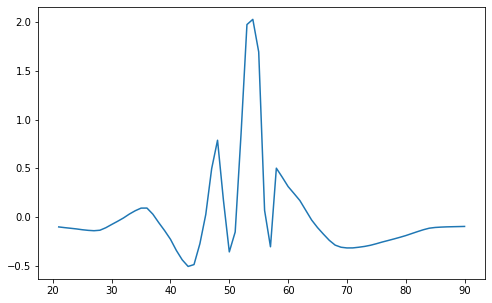

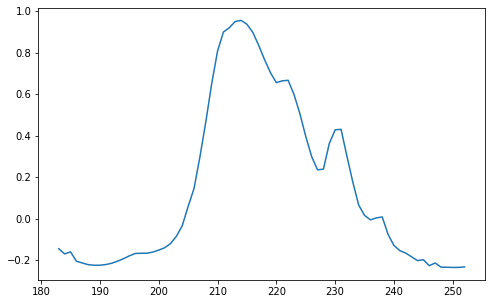

In [3]:
rp = rpeaks['ECG_R_Peaks']
plt.plot(ecg_signal[rp[0]-20:rp[0]+50])
plt.show()

rp1 = rpeaks1['ECG_R_Peaks']
plt.plot(ecg_signal1[rp1[0]-20:rp1[0]+50])
plt.show()

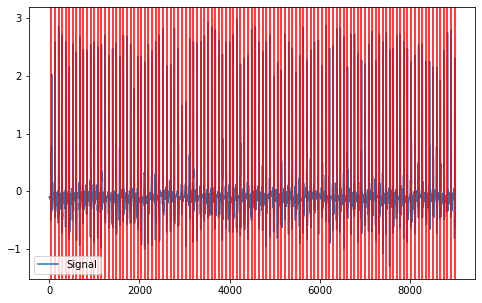

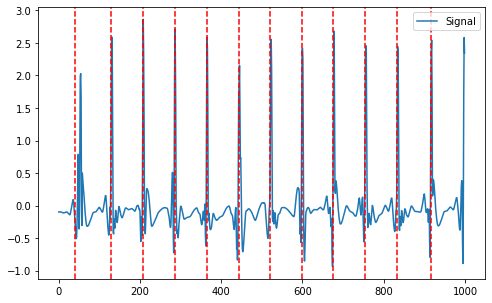

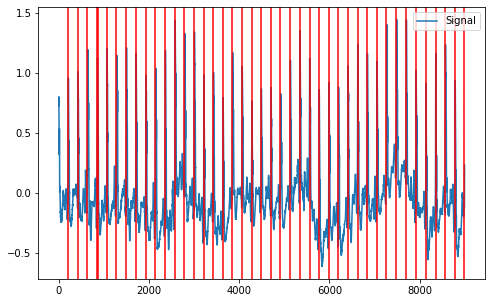

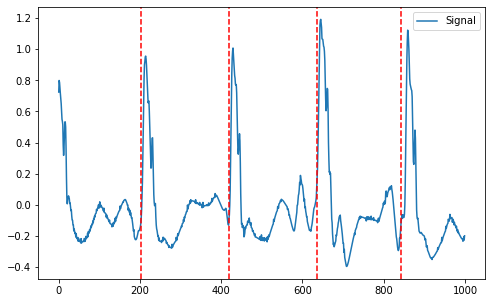

In [4]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal,show=True,color = "red",linestyle = "solid")
#plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal1,show=True,color = "red",linestyle = "solid")

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:12], ecg_signal[:1000])
#plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:12], ecg_signal1[:1000])


# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks1['ECG_R_Peaks'], ecg_signal1,show=True,color = "red",linestyle = "solid")
#plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal1,show=True,color = "red",linestyle = "solid")

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks1['ECG_R_Peaks'][:4], ecg_signal1[:1000])
#plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:12], ecg_signal1[:1000])

In [5]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=100)
_, waves_peak1 = nk.ecg_delineate(ecg_signal1, rpeaks1, sampling_rate=100)

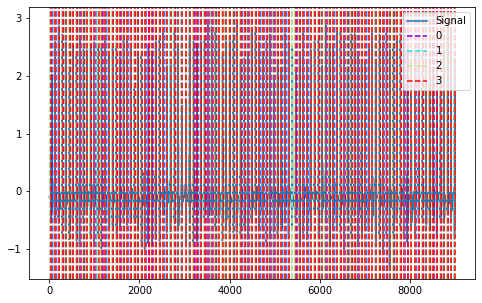

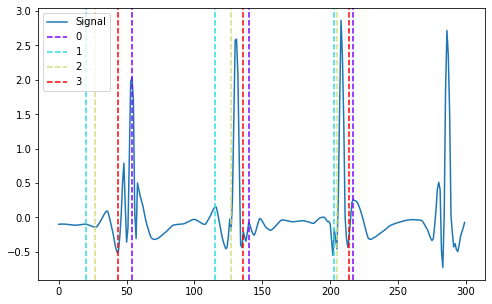

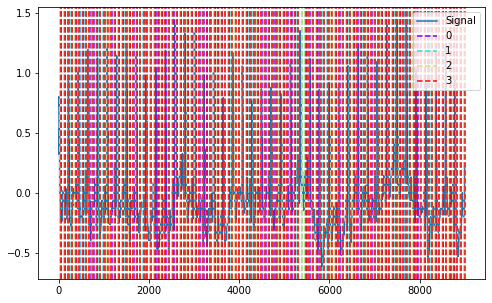

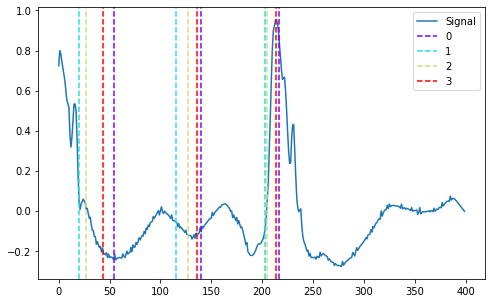

In [6]:
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg_signal)

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:300])

# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg_signal1)

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal1[:400])


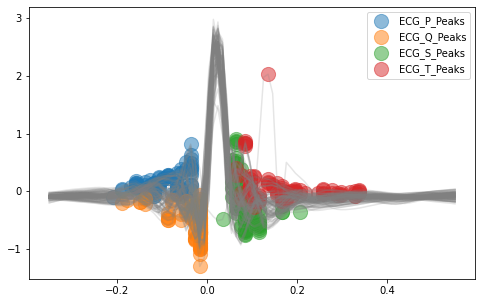

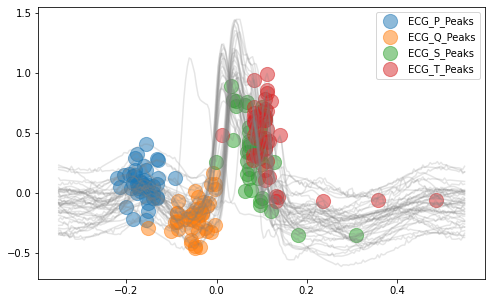

In [7]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=100, show=True, show_type='peaks')
_, waves_peak1 = nk.ecg_delineate(ecg_signal1, rpeaks1, sampling_rate=250, show=True, show_type='peaks')

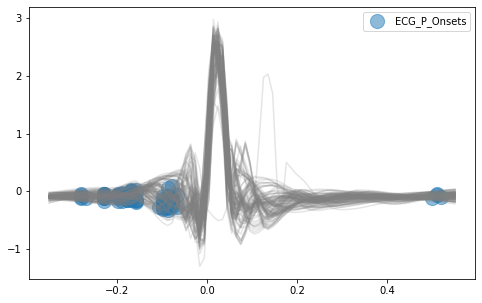

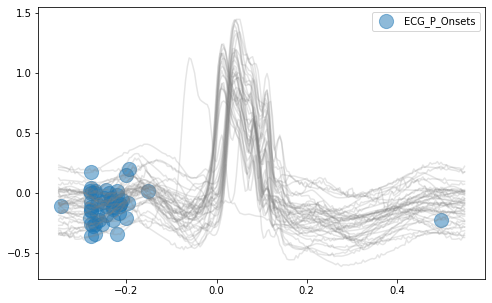

In [8]:
# Delineate the ECG signal and visualizing all P-peaks boundaries
signal_peak, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=100, show=True, show_type='bounds_P')
signal_peak1, waves_peak1 = nk.ecg_delineate(ecg_signal1, rpeaks1, sampling_rate=250, show=True, show_type='bounds_P')


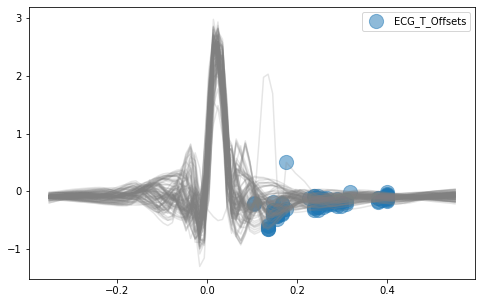

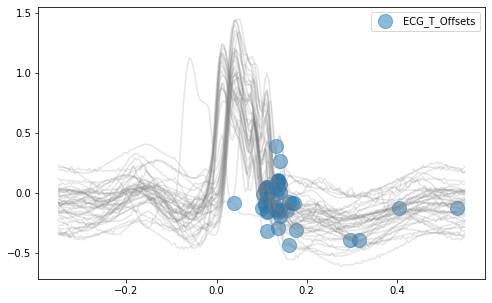

In [9]:
# Delineate the ECG signal and visualizing all T-peaks boundaries
signal_peak, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=100, show=True, show_type='bounds_T')
signal_peak1, waves_peak1 = nk.ecg_delineate(ecg_signal1, rpeaks1, sampling_rate=250, show=True, show_type='bounds_T')

c:\users\sundhar\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\sundhar\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


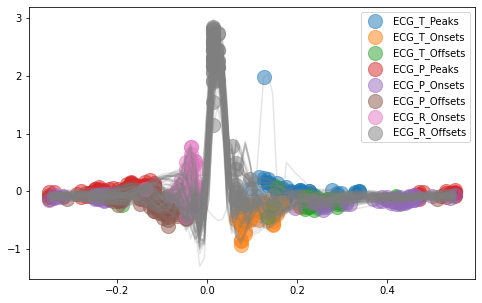

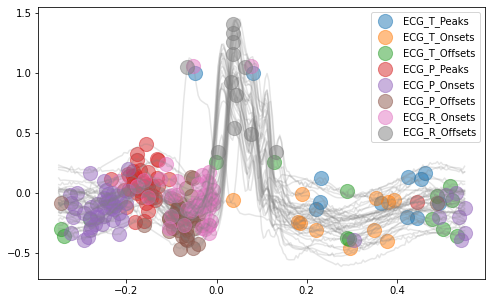

In [10]:
#------------------------DISCRETE WAVELET TRANSFORM---------------------------#

# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=100, method="dwt", show=True, show_type='all')
signal_dwt1, waves_dwt1 = nk.ecg_delineate(ecg_signal1, rpeaks1, sampling_rate=250, method="dwt", show=True, show_type='all')

c:\users\sundhar\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\sundhar\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


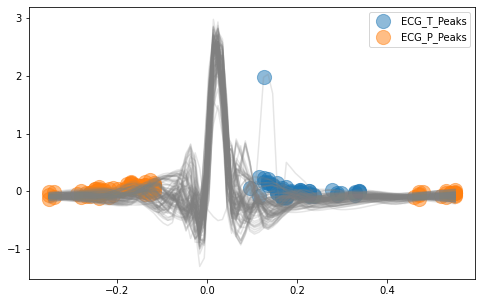

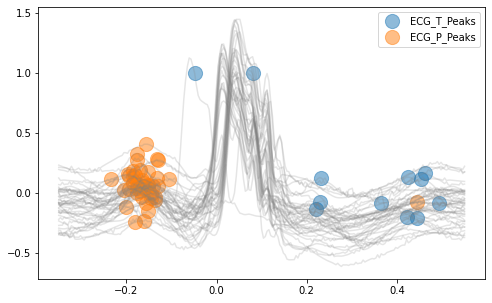

In [11]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=100, method="dwt", show=True, show_type='peaks')
signal_dwt1, waves_dwt1 = nk.ecg_delineate(ecg_signal1, rpeaks1, sampling_rate=250, method="dwt", show=True, show_type='peaks')

c:\users\sundhar\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\sundhar\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


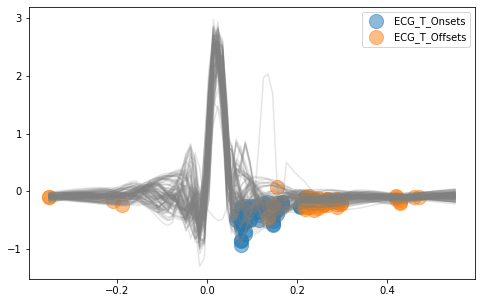

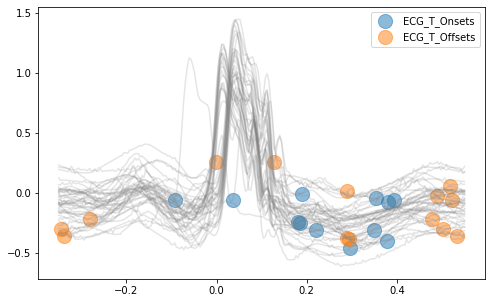

In [12]:
# visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=100, method="dwt", show=True, show_type='bounds_T')
signal_dwt1, waves_dwt1 = nk.ecg_delineate(ecg_signal1, rpeaks1, sampling_rate=250, method="dwt", show=True, show_type='bounds_T')

c:\users\sundhar\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\sundhar\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


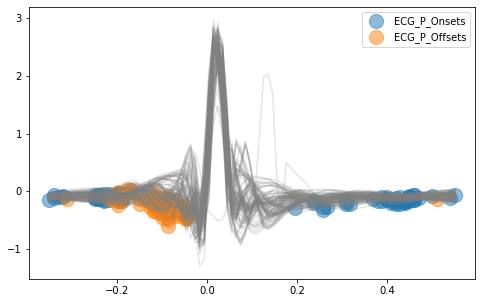

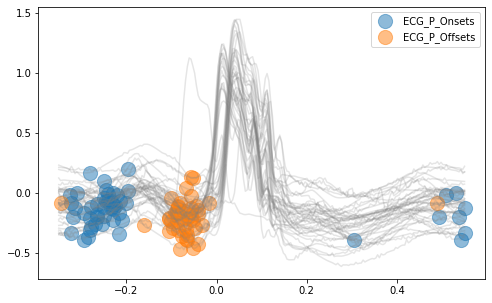

In [13]:
# Visualize P-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=100, method="dwt", show=True, show_type='bounds_P')
signal_dwt1, waves_dwt1 = nk.ecg_delineate(ecg_signal1, rpeaks1, sampling_rate=250, method="dwt", show=True, show_type='bounds_P')


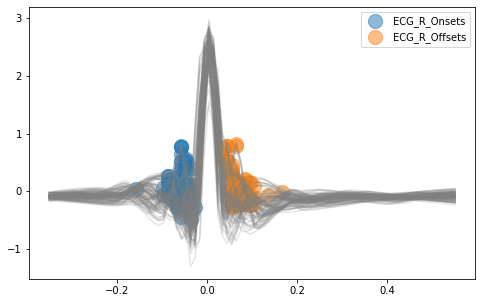

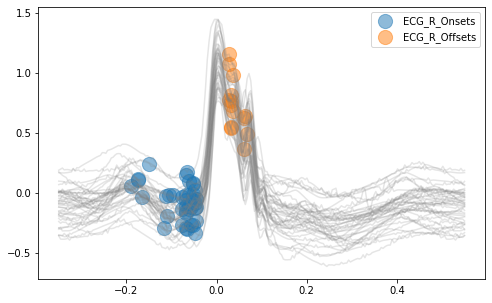

In [14]:
# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks=None, sampling_rate=100, method="dwt", show=True, show_type='bounds_R')
signal_dwt1, waves_dwt1 = nk.ecg_delineate(ecg_signal1, rpeaks=None, sampling_rate=250, method="dwt", show=True, show_type='bounds_R')

In [15]:
print(signal_dwt)
print(signal_dwt1)

      ECG_T_Peaks  ECG_T_Onsets  ECG_T_Offsets  ECG_P_Peaks  ECG_P_Onsets  \
0               0             0              0            0             0   
1               0             0              0            0             0   
2               0             0              0            0             0   
3               0             0              0            0             0   
4               0             0              0            0             0   
...           ...           ...            ...          ...           ...   
8995            0             0              0            0             0   
8996            0             0              0            0             0   
8997            0             0              0            0             0   
8998            0             0              0            0             0   
8999            0             0              0            0             0   

      ECG_P_Offsets  ECG_R_Onsets  ECG_R_Offsets  
0                 0     

In [16]:
print(waves_dwt)
print(len(waves_dwt))

print(waves_dwt1)
print(len(waves_dwt1))

{'ECG_T_Peaks': [99, 149, 218, 301, 381, 467, 553, 613, 709, 772, 844, nan, 1029, nan, 1190, 1254, nan, nan, nan, 1581, 1661, 1742, nan, 1908, nan, 2054, 2150, 2214, 2295, 2374, 2454, 2549, 2619, 2709, 2790, nan, 2955, 3043, 3133, 3230, 3294, nan, 3469, 3552, 3629, 3713, 3772, nan, nan, nan, 4088, nan, nan, nan, 4420, 4499, 4589, 4669, 4766, 4830, 4910, 5003, 5075, 5166, 5245, 5341, nan, 5502, 5566, 5640, nan, 5813, 5901, 5982, nan, 6150, 6230, nan, 6384, 6487, 6550, 6645, 6709, 6789, 6859, 6941, 7021, 7110, nan, 7254, 7328, 7415, 7493, 7564, 7651, nan, nan, 7878, 7959, nan, 8132, 8206, 8283, 8373, 8454, 8534, 8614, 8694, 8774, 8853, 8934, nan], 'ECG_T_Onsets': [92, 144, 213, 294, 375, 463, 543, 605, 696, 768, 842, nan, 1019, nan, 1176, 1245, nan, nan, nan, 1576, 1655, 1735, nan, 1904, nan, 2045, 2140, 2206, 2285, 2365, 2445, 2543, 2613, 2702, 2781, nan, 2949, 3037, 3128, 3216, 3286, nan, 3463, 3544, 3623, 3696, 3770, nan, nan, nan, 4085, nan, nan, nan, 4414, 4494, 4584, 4662, 4756, 48

In [17]:
import pylab
import scipy.signal as signal
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy import signal
from scipy.integrate import trapz
from scipy.interpolate import interp1d
import seaborn as sns
from matplotlib.patches import Ellipse

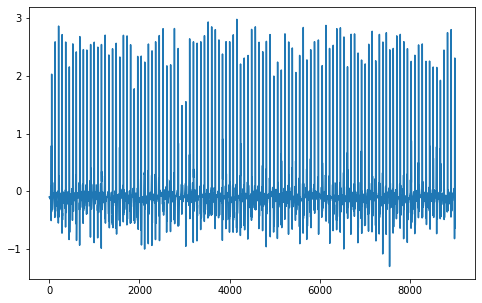

In [18]:
rp = rpeaks['ECG_R_Peaks']
plt.plot(ecg_signal)
plt.show()

In [19]:
def timedomain(rr):
    results = {}

    hr = 6000/rr
    
    results['Mean RR (ms)'] = np.mean(rr)
    results['STD RR/SDNN (ms)'] = np.std(rr)
    results['Mean HR (Kubios\' style) (beats/min)'] = 6000/np.mean(rr)
    results['Mean HR (beats/min)'] = np.mean(hr)
    results['STD HR (beats/min)'] = np.std(hr)
    results['Min HR (beats/min)'] = np.min(hr)
    results['Max HR (beats/min)'] = np.max(hr)
    results['RMSSD (ms)'] = np.sqrt(np.mean(np.square(np.diff(rr))))
    results['NNxx'] = np.sum(np.abs(np.diff(rr)) > 50)*1
    results['pNNxx (%)'] = 100 * np.sum((np.abs(np.diff(rr)) > 50)*1) / len(rr)
    return results

In [20]:
def frequency_domain(rri, fs=4):
    # Estimate the spectral density using Welch's method
    fxx, pxx = signal.welch(x=rr_interpolated, fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
    lf = trapz(pxx[cond_lf], fxx[cond_lf])
    hf = trapz(pxx[cond_hf], fxx[cond_hf])
    
    # sum these up to get total power
    total_power = vlf + lf + hf

    # find which frequency has the most power in each band
    peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])]
    peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])]
    peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])]

    # fraction of lf and hf
    lf_nu = 100 * lf / (lf + hf)
    hf_nu = 100 * hf / (lf + hf)
    
    results = {}
    results['Power VLF (ms2)'] = vlf
    results['Power LF (ms2)'] = lf
    results['Power HF (ms2)'] = hf   
    results['Power Total (ms2)'] = total_power

    results['LF/HF'] = (lf/hf)
    results['Peak VLF (Hz)'] = peak_vlf
    results['Peak LF (Hz)'] = peak_lf
    results['Peak HF (Hz)'] = peak_hf

    results['Fraction LF (nu)'] = lf_nu
    results['Fraction HF (nu)'] = hf_nu
    return results, fxx, pxx


In [21]:
def plot_poincare(rr):
    rr_n = rr[:-1]
    rr_n1 = rr[1:]

    sd1 = np.sqrt(0.5) * np.std(rr_n1 - rr_n)
    sd2 = np.sqrt(0.5) * np.std(rr_n1 + rr_n)

    m = np.mean(rr)
    min_rr = np.min(rr)
    max_rr = np.max(rr)
    
    plt.figure(figsize=(10, 10))
    plt.title("Poincare plot")

    sns.scatterplot(x=rr_n, y=rr_n1, color="#51A6D8")

    plt.xlabel(r'$RR_n (ms)$')
    plt.ylabel(r'$RR_{n+1} (ms)$')

    e1 = Ellipse((m, m), 2*sd1, 2*sd2, angle=-45, linewidth=1.2, fill=False, color="k")
    plt.gca().add_patch(e1)

    plt.arrow(m, m, (max_rr-min_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)
    plt.arrow(m, m, (min_rr-max_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)

    plt.arrow(m, m, sd2 * np.sqrt(0.5), sd2 * np.sqrt(0.5), color="green", linewidth=5)
    plt.arrow(m, m, -sd1 * np.sqrt(0.5), sd1 * np.sqrt(0.5), color="red", linewidth=5)

    plt.text(max_rr, max_rr, "SD2", fontsize=20, color="green")
    plt.text(m-(max_rr-min_rr)*0.4-20, max_rr, "SD1", fontsize=20, color="red")
    
    return sd1, sd2

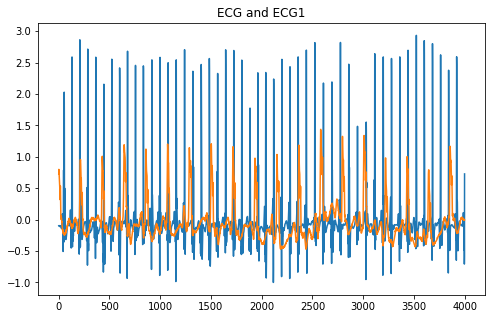

In [22]:
plt.plot(ecg_signal[0:4000])
plt.plot(ecg_signal1[0:4000])
plt.title("ECG and ECG1", color = "black")
plt.tick_params(axis="both", colors = "black")

In [23]:
diff_sig_2=np.diff(ecg_signal1)

In [24]:
# HR will probably not go below 30 bpm : distance=500*(30/60))
# prominence found experimentally
peaks_2, _ = find_peaks(diff_sig_2, distance=100*(30/60), prominence=0.01)

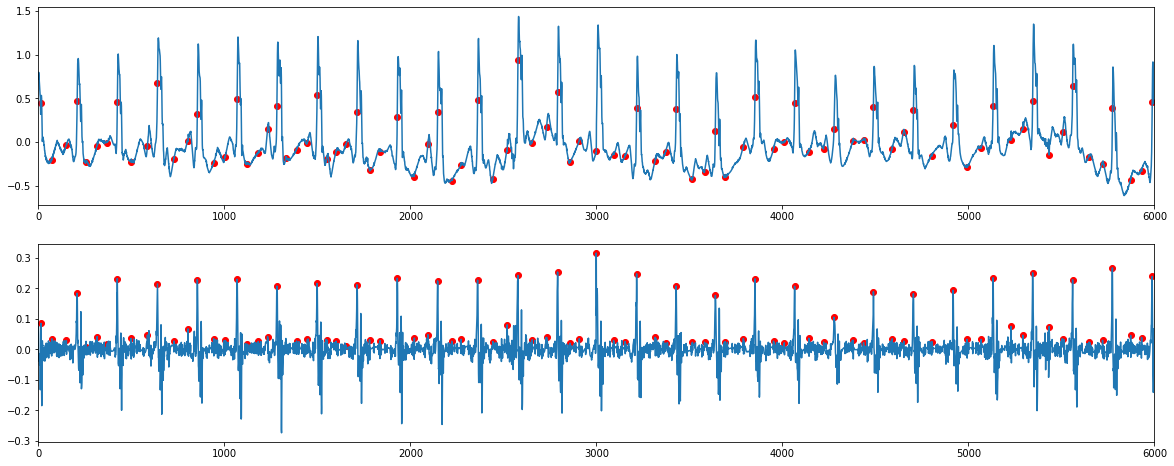

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.plot(ecg_signal1)
plt.scatter(peaks_2,ecg_signal1[peaks_2], color="red")
plt.gca().set_xlim(0, 6000)
plt.subplot(2,1,2)
plt.plot(diff_sig_2)
plt.scatter(peaks_2, diff_sig_2[peaks_2], color="red")
plt.gca().set_xlim(0, 6000)
plt.show()

In [26]:
rr_2 = np.diff(peaks_2)
corr_rr_2 = rr_2*10

In [27]:
timedomain(corr_rr_2)

{'Mean RR (ms)': 692.3255813953489,
 'STD RR/SDNN (ms)': 169.49314146745567,
 "Mean HR (Kubios' style) (beats/min)": 8.666442727578099,
 'Mean HR (beats/min)': 9.143505449706614,
 'STD HR (beats/min)': 1.9924710401732173,
 'Min HR (beats/min)': 4.838709677419355,
 'Max HR (beats/min)': 12.0,
 'RMSSD (ms)': 241.06048255572708,
 'NNxx': 97,
 'pNNxx (%)': 75.1937984496124}